<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Florence, Toscana, Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Florence, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv('https://data.insideairbnb.com/italy/toscana/florence/2024-06-22/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a propriedade possui no último mês
* `license` - esta coluna não contém nenhum valor válido

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,31840,A Residenza Martin Classic room,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,122.0,1,131,2024-06-08,0.77,31,353,7,NaN
1,32120,Welcome at Corte Verde in Florence,99235,Lucia,NaN,Gavinana Galluzzo,43.76157,11.27741,Entire home/apt,95.0,1,26,2023-10-09,0.16,1,53,2,NaN
2,32180,Charming Gem - Oltrarno City centre,13925330,Cesare,NaN,Centro Storico,43.76832,11.24348,Entire home/apt,109.0,6,34,2023-12-06,0.20,1,265,5,048017LTN9464
3,39115,Central Double Shared Bathroom,167739,Lorenzo,NaN,Centro Storico,43.77525,11.25258,Private room,104.0,2,78,2024-05-15,0.46,10,305,10,NaN
4,39165,Florence Central Double Private Bathroom,167739,Lorenzo,NaN,Centro Storico,43.77525,11.25258,Private room,121.0,2,21,2024-04-08,0.13,10,283,3,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb.

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	12246
Variáveis:	18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possuem 100% dos seus valores faltantes.
* A variável `license` possue valores nulos em quase 70% das linhas.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 12% das linhas.
* As variável `price` têm aproximadamente 4,0% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

,0
neighbourhood_group,100.000000
license,65.727585
reviews_per_month,11.660951
last_review,11.660951
price,3.258207
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
name,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, utilizarei o histograma.

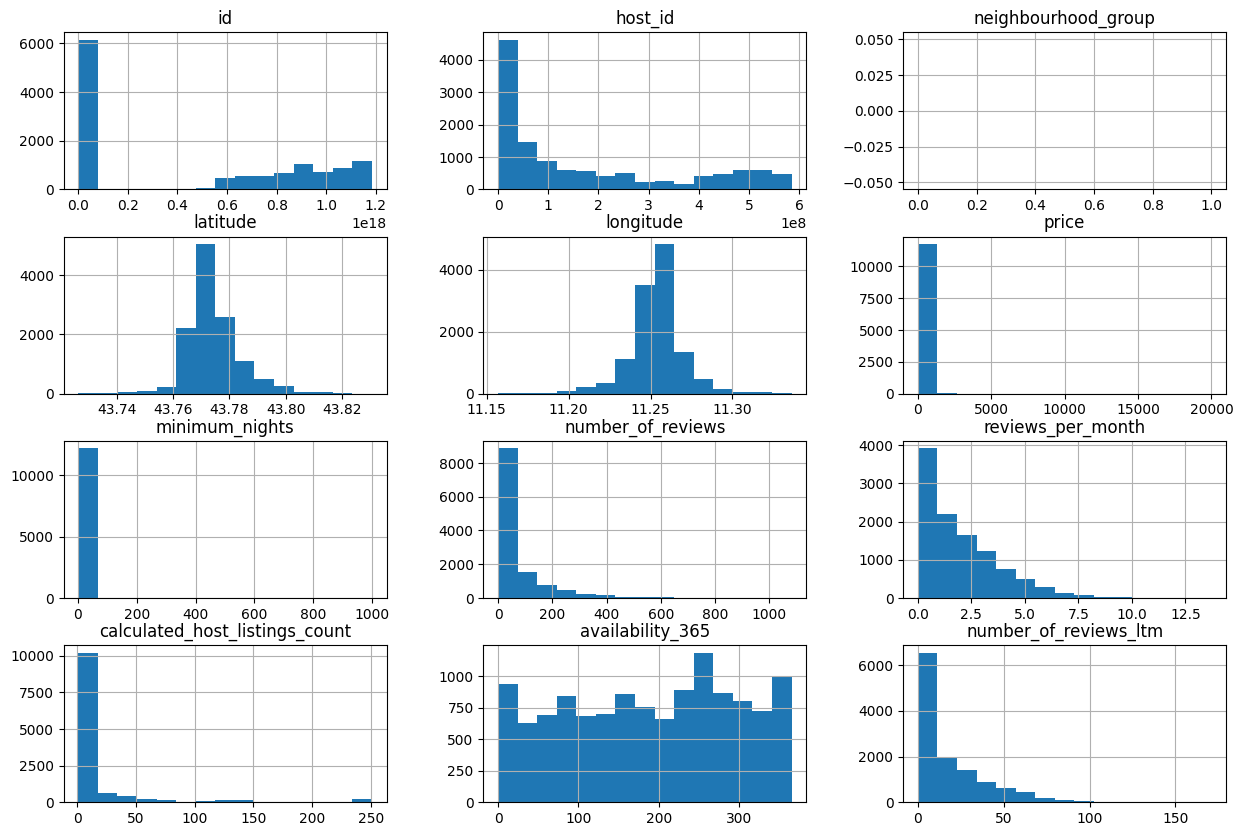

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

In [ ]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,11847.000000,12246.000000
mean,225.080864,3.307611
std,431.320006,17.816689
min,10.000000,1.000000
25%,107.000000,1.000000
50%,150.000000,2.000000
75%,232.000000,3.000000
max,20000.000000,999.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 232, porém seu valor máximo é 20.000.
* A variável `minimum_nights` possui 75% do valor abaixo de 3 dias, porém seu valor máximo é 999.

#### Verificação de outliers em `price`

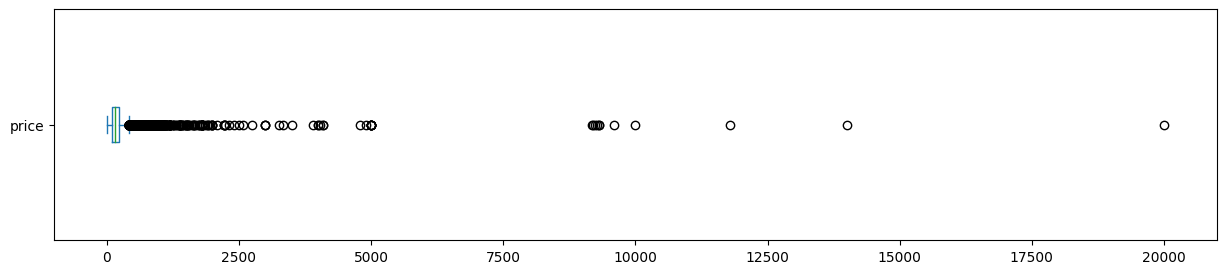


price: valores acima de 1250
99 entradas
0.8084%


In [ ]:
#verificando outliers em price
df.price.plot(kind='box',vert=False,figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 1250 para price
print('\nprice: valores acima de 1250')
print('{} entradas'.format(len(df[df.price>1250])))
print('{:.4f}%'.format((len(df[df.price>1250])/df.shape[0])*100))

#### Verificação de outliers em `minimun_nights`

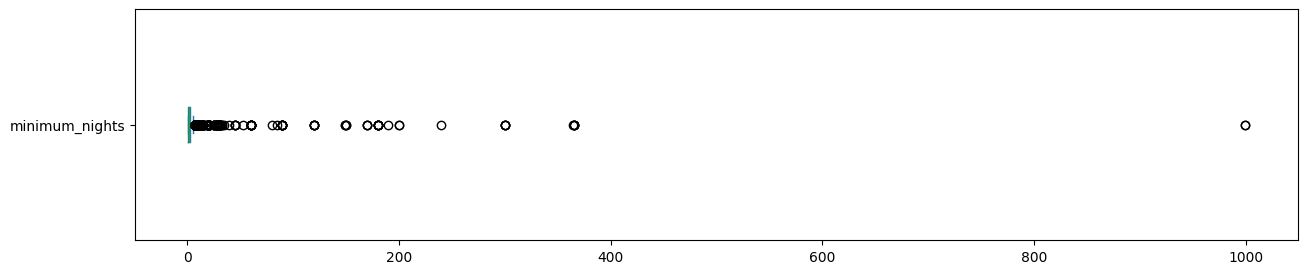


minimum_nights: valores acima de 30 dias
84 entradas
0.6859%


In [ ]:
#verificando outliers em minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 para minimum_nights
print('\nminimum_nights: valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights>30])))
print('{:.4f}%'.format((len(df[df.minimum_nights>30])/df.shape[0])*100))

#### Criação de um novo dataframe limpando os outliers

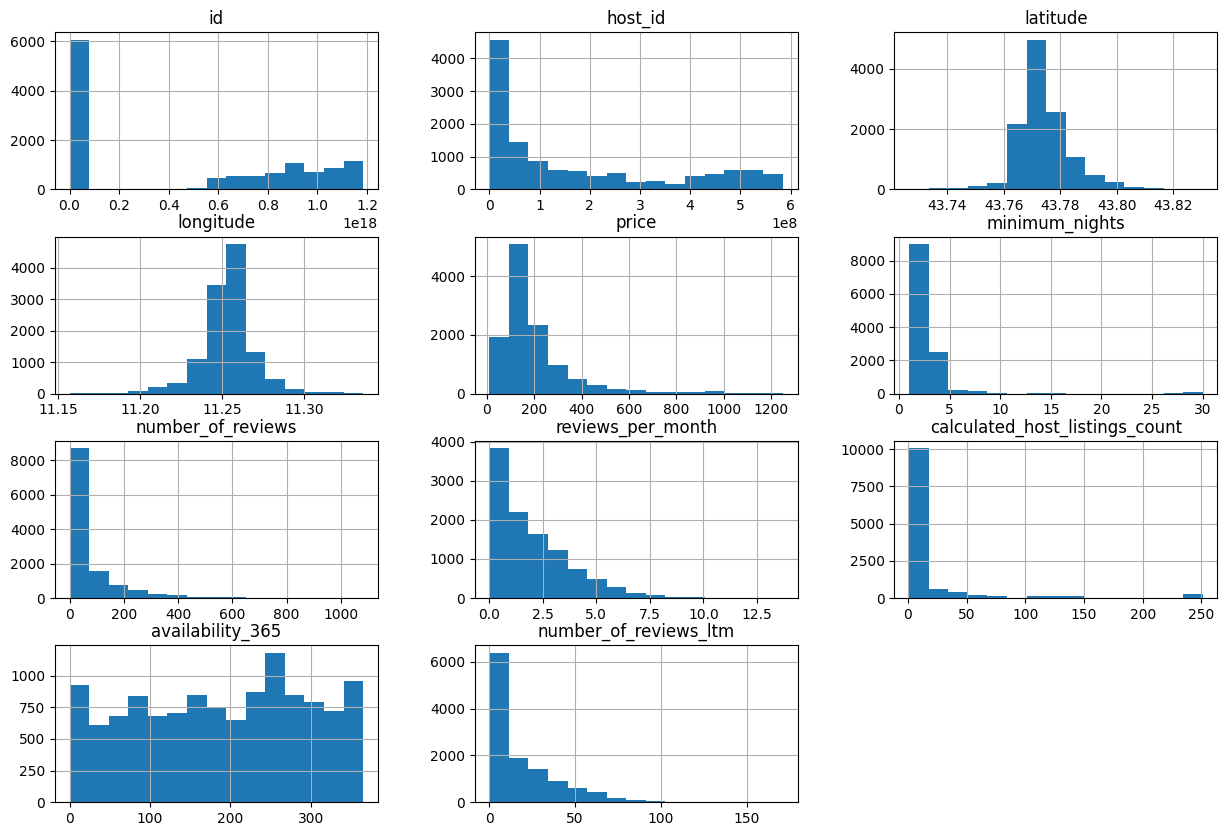

In [ ]:
# remover os *outliers* conforme verificação anterior
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1250].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois não possui dados
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

* A **média de preços de aluguel** para a cidade de Florence, Toscana, Itália está em torno de **199,75**.

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

199.75023554603854

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.098248,-0.101278,-0.098796,0.091343,0.071315
minimum_nights,-0.098248,1.000000,-0.037410,-0.132916,0.005073,-0.070147
number_of_reviews,-0.101278,-0.037410,1.000000,0.440983,-0.111935,-0.050641
reviews_per_month,-0.098796,-0.132916,0.440983,1.000000,-0.115802,0.026978
calculated_host_listings_count,0.091343,0.005073,-0.111935,-0.115802,1.000000,0.096516
availability_365,0.071315,-0.070147,-0.050641,0.026978,0.096516,1.000000


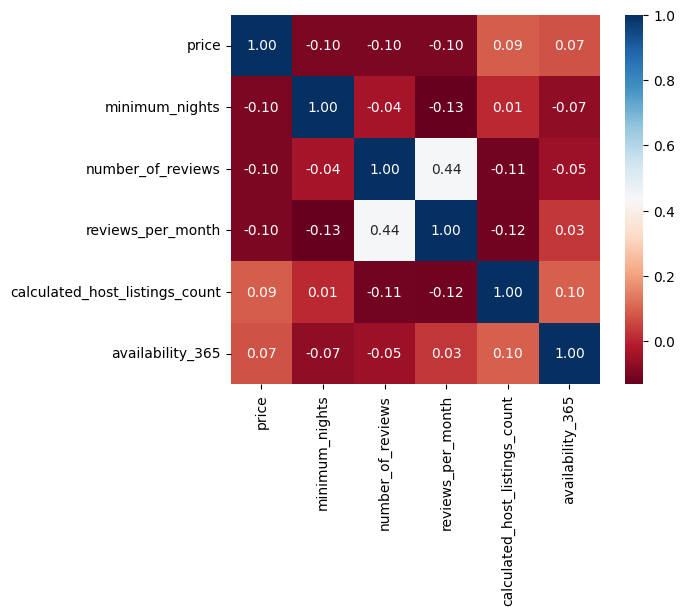

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,10028
Private room,1919
Hotel room,85
Shared room,34


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/df.shape[0])*100

,count
room_type,
Entire home/apt,81.887963
Private room,15.670423
Hotel room,0.694104
Shared room,0.277642


### **Q6. Qual a localidade mais cara de Florence, Toscana, Itália?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

,price
neighbourhood,
Centro Storico,222.409568
Gavinana Galluzzo,158.968037
Campo di Marte,142.137287
Isolotto Legnaia,134.970000
Rifredi,121.741453


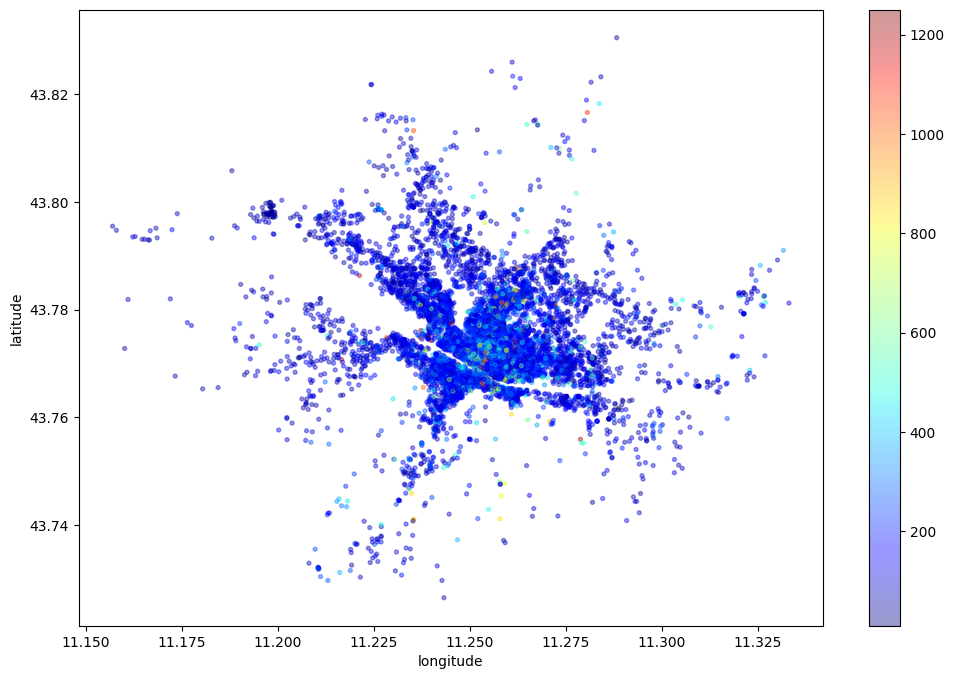

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.379081717221946

## Conclusões


A análise dos dados do Airbnb em Florença revelou que o mercado de aluguel é variado, com um preço médio de 199,75 euros, mas apresenta extremos devido a outliers. Algumas variáveis contêm muitos valores ausentes, o que impacta a qualidade dos dados. A identificação das localidades mais caras e dos tipos de imóveis mais alugados oferece insights úteis para anfitriões e investidores, ajudando a otimizar estratégias de precificação e ocupação. O estudo destaca tanto as oportunidades quanto os desafios do mercado de aluguel de curto prazo na cidade.